<a href="https://colab.research.google.com/github/grommitt/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/presentationCode/facebook_live_retail_thailand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**H0(Null hypothesis):**  There is no relationship between status_type and number of reactions.

**Ha(Alternative hypothesis):**  There is a relationship between status_type and number of reactions.

In [1]:
# import dataframe
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live.csv')

df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [0]:
# get rid of unnecessary columns
df.drop('status_id', axis=1, inplace=True)
df.drop('Column1', axis=1, inplace=True)
df.drop('Column2', axis=1, inplace=True)
df.drop('Column3', axis=1, inplace=True)
df.drop('Column4', axis=1, inplace=True)

In [3]:
# we're only looking at information regarding photos and videos so let's adjust the dataframe to only include those two
video = df[df['status_type'] == 'video']
photo = df[df['status_type'] == 'photo']

frames = [video, photo]

df = pd.concat(frames)

df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
6,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3
7,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1
15,video,4/1/2018 5:16,332,100,30,303,23,1,5,0,0


In [4]:
# check for null values
df.isnull().sum()

status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [5]:
df.describe()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000
mean,217.283449,236.805195,42.426457,201.419511,13.462398,1.306252,0.735125,0.238146,0.119148
std,447.236932,916.268048,135.414421,432.454699,41.124854,8.923553,4.078215,1.606485,0.747446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,4.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,214.000000,24.000000,5.000000,179.000000,4.000000,1.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [6]:
# Compute pairwise correlation of columns, excluding NA/null values.
df.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.165083,0.275475,0.994314,0.334020,0.277242,0.193290,0.086087,0.137463
num_comments,0.165083,1.000000,0.639468,0.113644,0.519473,0.161609,0.323891,0.243706,0.224546
num_shares,0.275475,0.639468,1.000000,0.193418,0.819376,0.411332,0.398617,0.206909,0.312120
num_likes,0.994314,0.113644,0.193418,1.000000,0.233537,0.213954,0.135355,0.061451,0.098809
num_loves,0.334020,0.519473,0.819376,0.233537,1.000000,0.512554,0.507085,0.214488,0.370991
num_wows,0.277242,0.161609,0.411332,0.213954,0.512554,1.000000,0.290016,0.089554,0.184718
num_hahas,0.193290,0.323891,0.398617,0.135355,0.507085,0.290016,1.000000,0.145182,0.211421
num_sads,0.086087,0.243706,0.206909,0.061451,0.214488,0.089554,0.145182,1.000000,0.145040
num_angrys,0.137463,0.224546,0.312120,0.098809,0.370991,0.184718,0.211421,0.145040,1.000000


Text(0.5, 1.0, 'Number of love reactions for video posts')

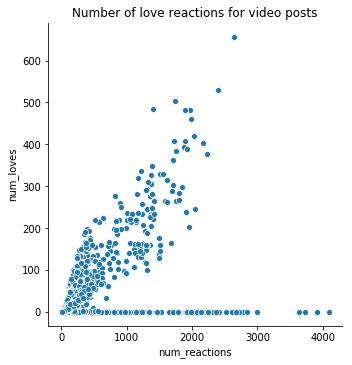

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt

#scatter plot with two features in df
sns.relplot(x="num_reactions", y="num_loves", data=video);
plt.title('Number of love reactions for video posts')


Text(0.5, 1.0, 'Number of love reactions for photo posts')

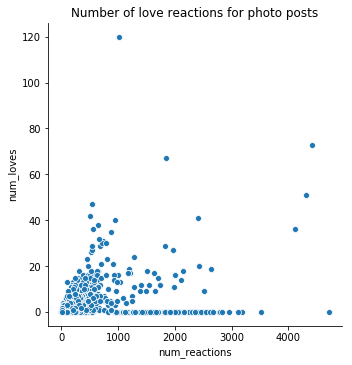

In [16]:
#scatter plot with two features in df
sns.relplot(x="num_reactions", y="num_loves", data=photo)
plt.title('Number of love reactions for photo posts')


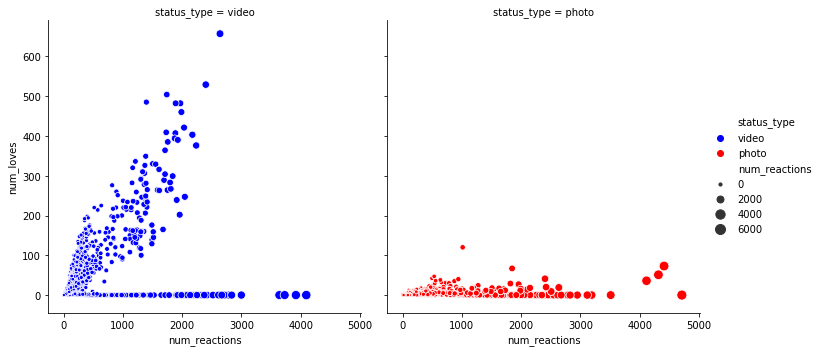

In [17]:
# look at plots side by side on same scale
g = sns.relplot(x="num_reactions", y="num_loves", hue="status_type", size="num_reactions",
                   palette=["b", "r"], sizes=(10, 100),
                   col="status_type", data=df)

In [0]:
#import libraries necessary for doing some statistics
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy import stats
import seaborn as sns
import numpy as np

In [9]:
# t-test the status types
ttest_ind(video.loc[0:, 'num_reactions': 'num_angrys'],
          photo.loc[0:, 'num_reactions': 'num_angrys'])

Ttest_indResult(statistic=array([ 8.92935643, 28.12178693, 35.4184757 ,  5.78883679, 35.09923905,
        7.71652409, 14.96866549,  6.58852894, 10.93387355]), pvalue=array([5.46974529e-019, 1.80532776e-164, 8.66267133e-252, 7.41199495e-009,
       1.13884641e-247, 1.37171997e-014, 7.63999277e-050, 4.78365048e-011,
       1.36531179e-027]))

In [10]:
# video number of shares vs. photo number of shares
ttest_ind(video.loc[0:, 'num_shares'],
          photo.loc[0:, 'num_shares'])

Ttest_indResult(statistic=35.41847570179075, pvalue=8.662671334544129e-252)

In [11]:
# create a column that categorizes reaction counts
cut_points = [0,99,199,299,399,499,10000]
label_names = ['0-99', '100-199', '200-299', '300-399', '400-499', '500+']
df['reactions_categories'] = pd.cut(df['num_reactions'], cut_points, labels=label_names)

df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,reactions_categories
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,500+
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,200-299
6,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,500+
7,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,200-299
15,video,4/1/2018 5:16,332,100,30,303,23,1,5,0,0,300-399


In [12]:
data = df[['status_type', 'reactions_categories']]
data.head()

,status_type,reactions_categories
0,video,500+
2,video,200-299
6,video,500+
7,video,200-299
15,video,300-399


In [13]:
data['reactions_categories'].value_counts()

0-99       3787
100-199     956
200-299     641
500+        619
300-399     343
400-499     155
Name: reactions_categories, dtype: int64

In [17]:
# find the information
contingency_table = pd.crosstab(data['status_type'], data['reactions_categories'], margins=True)

contingency_table

reactions_categories,0-99,100-199,200-299,300-399,400-499,500+,All
status_type,,,,,,,
photo,3012,458,250,156,66,319,4261
video,775,498,391,187,89,300,2240
All,155,343,956,641,619,3787,6501


In [18]:
photocount = contingency_table.iloc[0][0:6].values
photocount

array([3012,  458,  250,  156,   66,  319])

In [19]:
videocount = contingency_table.iloc[1][0:6].values
videocount

array([775, 498, 391, 187,  89, 300])

In [21]:
# Get Row Sums
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[4261 2240]
[ 155  343  956  641  619 3787]


In [22]:
# create expected values to plug into chi-squared formula
total = contingency_table.loc['All', 'All']
print(total)

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
print(np.array(expected))

6501
[[ 101.59283187  224.81510537  626.59836948  420.13551761  405.71588986
  2482.1422858 ]
 [  53.40716813  118.18489463  329.40163052  220.86448239  213.28411014
  1304.8577142 ]]


In [23]:
contingency = pd.crosstab(data['status_type'],
                          data['reactions_categories'])
contingency = contingency.values

print(contingency.shape)
print(contingency)

(2, 6)
[[3012  458  250  156   66  319]
 [ 775  498  391  187   89  300]]


In [24]:
# create chi-squared variable
chi_squared = ((contingency - expected)**2/(expected)).sum()
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 98013.65703627488


In [25]:
# Calculate Degrees of Freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}") 

Degrees of Freedom: 5


In [26]:
# Calculate the p-value from the chi_squared and dof
p_value = stats.chi2.sf(chi_squared, dof)
print(f"P-value: {p_value}")

P-value: 0.0


In [27]:
# finalized chi-squared test. print out results
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 810.9924822070991
P-value: 4.843615298931457e-173
Degrees of Freedom: 5
Expected: 
 [[2482.1422858   626.59836948  420.13551761  224.81510537  101.59283187
   405.71588986]
 [1304.8577142   329.40163052  220.86448239  118.18489463   53.40716813
   213.28411014]]


Due to these results of the low P-value, I reject the null hypothesis that there is no relationship between status_type and number of reactions to a post. The alternative hypothesis is true.